In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Face')

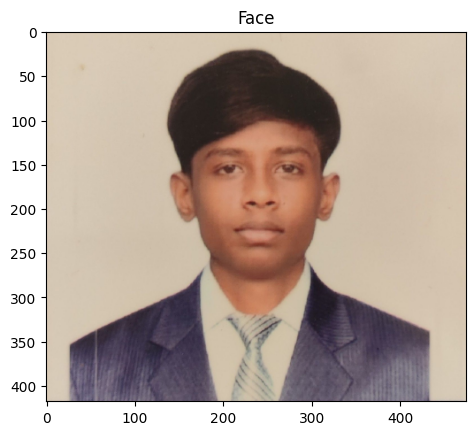

In [2]:
img = cv2.imread('mypic.png')
plt.imshow(img[:,:,::-1]);plt.title("Face")

Text(0.5, 1.0, 'glass')

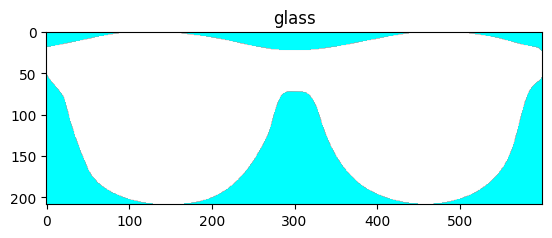

In [3]:
glassPNG=cv2.imread('glass.png',-1)
plt.imshow(glassPNG[:,:,::-1]);plt.title("glass")

In [5]:
glassPNG = cv2.resize(glassPNG,(190,50))
print("image Dimension =",glassPNG.shape)

image Dimension = (50, 190, 4)


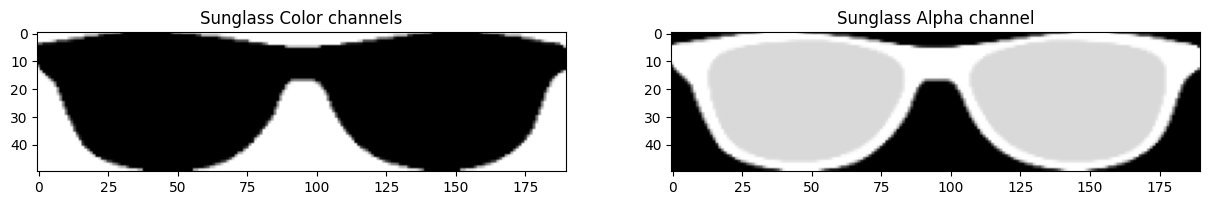

In [8]:
glassBGR = glassPNG[:,:,0:3]
glassMask1 = glassPNG[:,:,3]
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(glassBGR[:,:,::-1]);plt.title('Sunglass Color channels');
plt.subplot(122);plt.imshow(glassMask1,cmap='gray');plt.title('Sunglass Alpha channel');

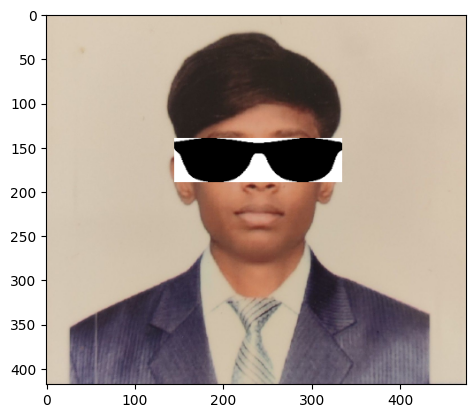

In [9]:
faceWithGlasses= img.copy()
faceWithGlasses[140:190,145:335]=glassBGR
plt.imshow(faceWithGlasses[...,::-1])


Text(0.5, 1.0, 'Augmented Eye and Sunglass')

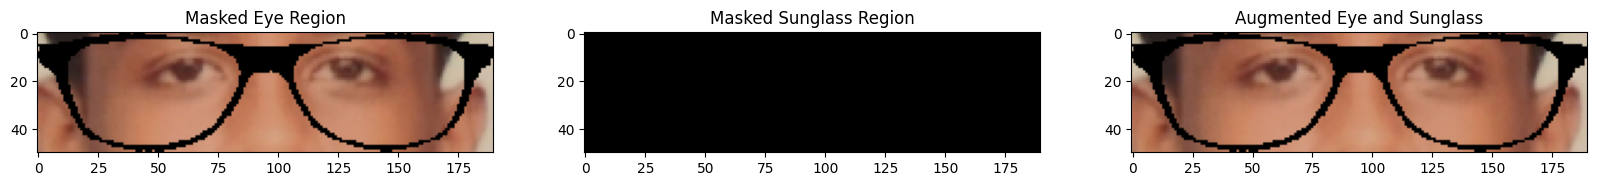

In [10]:
glassMask = cv2.merge((glassMask1,glassMask1,glassMask1))
glassMask = np.uint8(glassMask/255)
faceWithGlassesArithmetic = img.copy()
eyeROI= faceWithGlassesArithmetic[140:190,145:335]
maskedEye = cv2.multiply(eyeROI,(1-  glassMask ))
maskedGlass = cv2.multiply(glassBGR,glassMask)
eyeRoiFinal = cv2.add(maskedEye, maskedGlass)
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(maskedEye[...,::-1]);plt.title("Masked Eye Region")
plt.subplot(132);plt.imshow(maskedGlass[...,::-1]);plt.title("Masked Sunglass Region")
plt.subplot(133);plt.imshow(eyeRoiFinal[...,::-1]);plt.title("Augmented Eye and Sunglass")

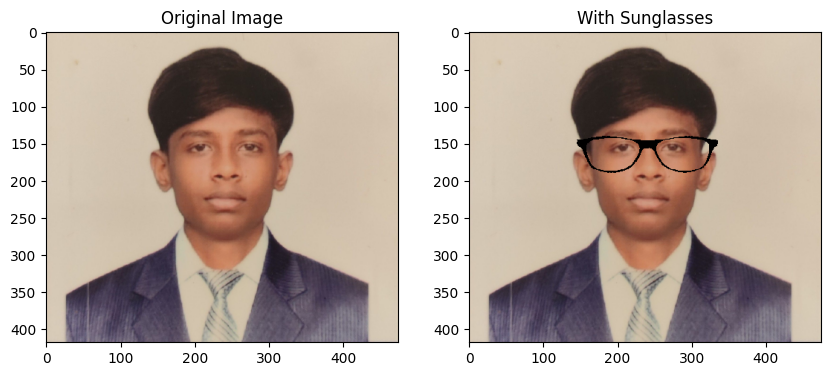

In [12]:
faceWithGlassesArithmetic[140:190,145:335]=eyeRoiFinal
plt.figure(figsize=[10,10]);
plt.subplot(121);plt.imshow(img[:,:,::-1]); plt.title("Original Image");
plt.subplot(122);plt.imshow(faceWithGlassesArithmetic[:,:,::-1]);plt.title("With Sunglasses");